In [11]:
import glob
import pickle

In [12]:
def preprocess(strings: list[str]):
    if strings is None:
        return None
    
    num = strings[0] 
    if len(num) > 2:
        return None
    else:
        return int(num)

In [13]:
from collections import defaultdict

results = defaultdict(lambda: defaultdict(list))
question_path = "./data/questions/"

for model_path in glob.glob(question_path+"*"):
    model_name = model_path.replace(question_path, "")
    print(f"model_name: {model_name}")
    eval_paths = glob.glob(model_path+"/evaluation*")
    print(eval_paths)

    for eval_path in eval_paths:
        questions = pickle.load(open(eval_path, "rb"))

        for lecture_index in questions:
            # print(questions[lecture_index].topic)
    
            for question_index in range(len(questions[lecture_index].questions)):
                print(questions[lecture_index].evaluations[question_index].get('relevance'))
                # print(questions[lecture_index].evaluations[question_index].get('reasoning'))
                
                relevance = preprocess(questions[lecture_index].evaluations[question_index].get('relevance'))
                difficulty = preprocess(questions[lecture_index].evaluations[question_index].get('difficulty'))
                if relevance is not None:
                    results[model_name]["relevance"].append(relevance)
                else:
                    results[model_name]["relevance"].append(0)
                if difficulty is not None:
                    results[model_name]["difficulty"].append(difficulty)
                else:
                    results[model_name]["difficulty"].append(0)

model_name: gpt4o
['./data/questions/gpt4o/evaluations_1.pkl', './data/questions/gpt4o/evaluations_2.pkl']
['8']
['9']
['10']
['10']
['9']
['8']
['8']
['10']
['9']
['9']
['10']
['9']
['10']
['10']
['9']
['10']
['10']
['10']
['10']
['10']
['9']
['10']
['10']
['10']
['10']
model_name: local
['./data/questions/local/evaluations.pkl']
['8']
['10']
['9']
['0']
['10']
['10']
['9']
['10']
['10']
['9']
['10']
['10']
['9']
['10', '10', '10', '10', '10', '10', '10', '8', '8']
None
['8']
['8']
['10']
['8']
['10']
['8']
['7']
['9']
['8']
['9']
None
None
['8\n<difficulty>5\nThis question requires understanding the concept of N-gram probabilities and their combination through linear interpolation, as well as knowing that simple linear interpolation might not always provide the best results in practice. The information is relevant to anyone studying statistical language models or NLP, and the difficulty level is moderate.\n']
['10']
None
['10']
['9']
['10']
['10']
['8']
['10']
['9']
['10']
['10']
['9

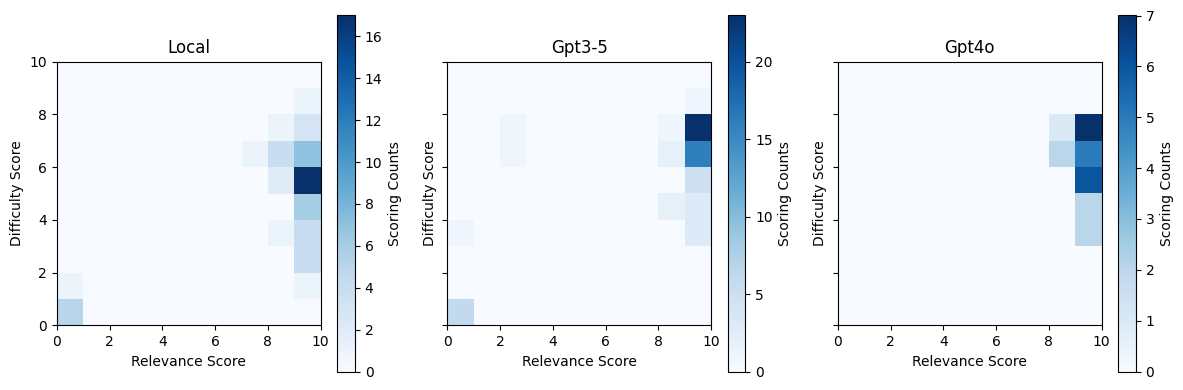

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# plt.hist2d()
fig = plt.figure(figsize=(12, 4))
axs = fig.subplots(1, 3, sharex=True, sharey=True)
hs = []
cbs = []
density = False

hists = np.reshape([plt.hist2d(results[model_name]["relevance"], 
                results[model_name]["difficulty"], 
                range=[[0, 10],[0, 10]])[0] for model_name in results], 
                (1, -1))
vmin = np.min(hists)
vmax = np.max(hists)
# norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

model_names = ["local", "gpt3-5", "gpt4o"]

for index, model_name in enumerate(model_names):
    axs[index].set_aspect('equal')
    axs[index].set_title(model_name.capitalize())
    hs.append(axs[index].hist2d(
                results[model_name]["relevance"], 
                results[model_name]["difficulty"], 
                [10, 10], range=[[0, 10],[0, 10]],
                cmap="Blues", density=False))
    axs[index].set_xlabel("Relevance Score")
    axs[index].set_ylabel("Difficulty Score")
    cbs.append(fig.colorbar(hs[index][3], ax=axs[index], ))
    cbs[index].set_label("Scoring"+(" Density" if density else " Counts"))

plt.savefig("./poster/figures/eval_plot.png")
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

xbins, ybins = 10, 10
figs = []

# Create a subplot figure
fig = make_subplots(rows=1, cols=3, subplot_titles=('Plot 1', 'Plot 2', 'Plot 3'))

for index, model_name in enumerate(results):
    figs.append(px.density_heatmap(x=results[model_name]["relevance"], y=results[model_name]["difficulty"], nbinsx=xbins, nbinsy=ybins))

    for trace in figs[index].data:
        fig.add_trace(trace, row=1, col=1)


# Add traces from each plotly express figure to the subplot


# for trace in fig2.data:
#     fig.add_trace(trace, row=1, col=2)

# for trace in fig3.data:
#     fig.add_trace(trace, row=1, col=3)

# Update layout for better spacing
fig.update_layout(height=600, width=1200, title_text='2D Histograms in Subplots')

# Show the figure
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed